# 1 Data Preprocessing

In [1]:
import numpy as np
import pandas as pd

df = pd.read_excel("interview_sample_data.xlsx")
df

,CONTRACT_NO,CUSTOMER_NO,START_DATE,DATE_OF_LOAN_MATURITY,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group,Bad Flag
0,contract_25103,26102,2019-02-18,2024-10-01,BIRKART,60.0,6400.0,Iphone,Biləsuvar,M,Ministry of Internal Affair,Other,1073.54,56.992272,Aran,Aran,0
1,contract_178508,179507,2019-08-09,2022-09-08,GTK,36.0,2450.0,Unknown,Masallı,M,Ministry of Education,Teacher,399.84,34.938431,Lankaran,Lankaran,0
2,contract_44173,45172,2019-08-14,2024-10-07,BIRKART,60.0,2200.0,Xiaomi,Bakı,M,Ministry of Emergency,Other,1064.94,35.965146,Baku,Baku,0
3,contract_110572,111571,2019-06-25,2022-06-25,GTK,36.0,8000.0,Iphone,Bakı,F,Government's committees,Other,1242.00,23.953948,Baku,Baku,0
4,contract_44085,45084,2019-06-13,2023-06-13,GTK,48.0,7000.0,Xiaomi,Salyan,M,Executive Authority,Economist,365.43,29.999247,Aran,Aran,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,contract_33007,12564,2019-12-18,2022-12-18,GTK,36.0,2120.0,Xiaomi,Astara,F,Executive Authority,Technision,207.00,37.654435,Lankaran,Lankaran,0
29996,contract_173631,174630,2019-09-16,2023-09-16,GTK,48.0,3350.0,Xiaomi,Tərtər,F,Other Ministries,Technision,263.25,NaN,Yukhari Qarabag,Baku,0
29997,contract_61236,62235,2019-07-17,2022-07-17,GTK,36.0,2340.0,Unknown,Zərdab,M,OJSC or CJSC Government's Companies,Technision,256.00,34.593455,Aran,Aran,0
29998,contract_209538,210537,2019-01-23,2020-01-23,GTK,12.0,2750.0,Xiaomi,Şəmkir,M,Ministry of Forces,Gizir\MAXE,680.53,30.857495,Ganja-Qazakh,Ganja-Qazakh,0


In [2]:
df.isna().sum()

CONTRACT_NO                0
CUSTOMER_NO                0
START_DATE                 0
DATE_OF_LOAN_MATURITY     34
PRODUCT                    0
tenure                    34
INITIAL_AMOUNT             0
mobile_name                0
CUSTOMER_CITY            192
gender                   555
Ministry                 478
Position                   0
Avg_salary               490
age                      312
Region_Location            0
Loan_location_group        0
Bad Flag                   0
dtype: int64

### Filling NaN's in 'DATE_OF_LOAN_MATURITY' column with 'START_DATE' + average loan duration

In [3]:
from datetime import timedelta

df_2 = df.copy()[['START_DATE', 'DATE_OF_LOAN_MATURITY']]
df_2 = df_2.dropna()
df_2 = df_2.reset_index()

duration = []
for i in range(0, len(df_2)):
    duration.append(df_2['DATE_OF_LOAN_MATURITY'][i] - df_2['START_DATE'][i])

df_2['Duration'] = duration
mean_duration = df_2['Duration'].mean(numeric_only = False)
mean_duration_days = timedelta(mean_duration.days)

df['DATE_OF_LOAN_MATURITY'] = df['DATE_OF_LOAN_MATURITY'].fillna(df['START_DATE'] + mean_duration_days)

### Filling NaN's in 'gender', 'Ministry', and 'CUSTOMER_CITY' columns with 'Unknown's

In [4]:
df['gender'] = df['gender'].fillna('Unknown')
df['Ministry'] = df['Ministry'].fillna('Unknown')
df['CUSTOMER_CITY'] = df['CUSTOMER_CITY'].fillna('Unknown')

### Filling NaN's in 'tenure', 'Avg_salary', and 'age' columns with mean

In [5]:
df['tenure'] = df['tenure'].fillna(df['tenure'].mean())
df['Avg_salary'] = df['Avg_salary'].fillna(df['Avg_salary'].mean())
df['age'] = df['age'].fillna(df['age'].mean())

### Data Cleaning

In [6]:
df['CUSTOMER_CITY'] = df['CUSTOMER_CITY'].replace(['Xanlar'], 'Göygöl')
df['CUSTOMER_CITY'] = df['CUSTOMER_CITY'].replace(['Dəliməmmədli'],'Goranboy')
df['CUSTOMER_CITY'] = df['CUSTOMER_CITY'].replace(['Baku'], 'Bakı')
df['CUSTOMER_CITY'] = df['CUSTOMER_CITY'].replace(['Ismaıly'],'İsmayıllı')
df['CUSTOMER_CITY'] = df['CUSTOMER_CITY'].replace(['SAATLI'],'Saatlı')
df['CUSTOMER_CITY'] = df['CUSTOMER_CITY'].replace(['Tər-tər'],'Tərtər')
df['CUSTOMER_CITY'] = df['CUSTOMER_CITY'].replace([',şahbuz'], 'Şahbuz')
df['Loan_location_group'] = df['Loan_location_group'].replace(['null (missing)'], 'Unknown')
df['Ministry'] = df['Ministry'].replace(['Not known'], 'Unknown')

In [7]:
df.isna().sum()

CONTRACT_NO              0
CUSTOMER_NO              0
START_DATE               0
DATE_OF_LOAN_MATURITY    0
PRODUCT                  0
tenure                   0
INITIAL_AMOUNT           0
mobile_name              0
CUSTOMER_CITY            0
gender                   0
Ministry                 0
Position                 0
Avg_salary               0
age                      0
Region_Location          0
Loan_location_group      0
Bad Flag                 0
dtype: int64

In [8]:
for i in range(0, len(df['CONTRACT_NO'])):
    df.loc[i,'CONTRACT_NO'] = df['CONTRACT_NO'][i][9:]

df['CONTRACT_NO'] = df['CONTRACT_NO'].astype(np.int64)

### LabelEncoder

In [9]:
from sklearn.preprocessing import LabelEncoder

df_le = df.copy()

le_PRODUCT = LabelEncoder()
df_le['PRODUCT'] = le_PRODUCT.fit_transform(df_le['PRODUCT'])

le_mobile_name = LabelEncoder()
df_le['mobile_name'] = le_mobile_name.fit_transform(df_le['mobile_name'])

le_CUSTOMER_CITY = LabelEncoder()
df_le['CUSTOMER_CITY'] = le_CUSTOMER_CITY.fit_transform(df_le['CUSTOMER_CITY'])

le_gender = LabelEncoder()
df_le['gender'] = le_gender.fit_transform(df_le['gender'])

le_Ministry = LabelEncoder()
df_le['Ministry'] = le_Ministry.fit_transform(df_le['Ministry'])

le_Position = LabelEncoder()
df_le['Position'] = le_Position.fit_transform(df_le['Position'])

le_Region_Location = LabelEncoder()
df_le['Region_Location'] = le_Region_Location.fit_transform(df_le['Region_Location'])

le_Loan_location_group = LabelEncoder()
df_le['Loan_location_group'] = le_Loan_location_group.fit_transform(df_le['Loan_location_group'])

In [10]:
df_le

,CONTRACT_NO,CUSTOMER_NO,START_DATE,DATE_OF_LOAN_MATURITY,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group,Bad Flag
0,25103,26102,2019-02-18,2024-10-01,0,60.0,6400.0,2,11,1,7,9,1073.54,56.992272,1,1,0
1,178508,179507,2019-08-09,2022-09-08,1,36.0,2450.0,9,30,1,4,11,399.84,34.938431,5,5,0
2,44173,45172,2019-08-14,2024-10-07,0,60.0,2200.0,11,8,1,5,9,1064.94,35.965146,2,2,0
3,110572,111571,2019-06-25,2022-06-25,1,36.0,8000.0,2,8,0,2,9,1242.00,23.953948,2,2,0
4,44085,45084,2019-06-13,2023-06-13,1,48.0,7000.0,11,46,1,0,0,365.43,29.999247,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,33007,12564,2019-12-18,2022-12-18,1,36.0,2120.0,11,1,0,0,12,207.00,37.654435,5,5,0
29996,173631,174630,2019-09-16,2023-09-16,1,48.0,3350.0,11,52,0,10,12,263.25,39.577453,9,2,0
29997,61236,62235,2019-07-17,2022-07-17,1,36.0,2340.0,9,66,1,9,12,256.00,34.593455,1,1,0
29998,209538,210537,2019-01-23,2020-01-23,1,12.0,2750.0,11,75,1,6,2,680.53,30.857495,4,4,0


# 2 Data Visualization

Text(0, 0.5, 'Position')

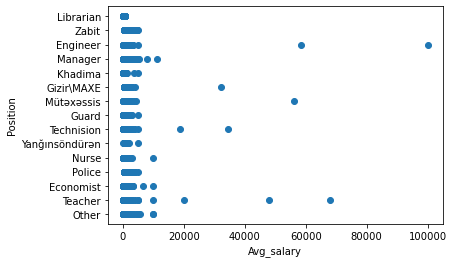

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(df['Avg_salary'], df['Position'])
ax.set_xlabel('Avg_salary')
ax.set_ylabel('Position')

Text(0, 0.5, 'Tenure')

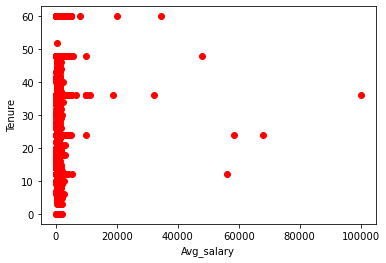

In [12]:
fig, ax = plt.subplots()
ax.scatter(df['Avg_salary'], df['tenure'], color='red')
ax.set_xlabel('Avg_salary')
ax.set_ylabel('Tenure')

Text(0, 0.5, 'Frequency')

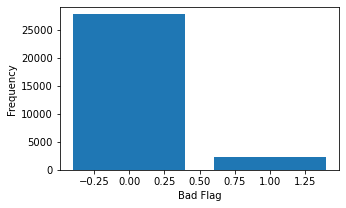

In [13]:
fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(5)
data = df['Bad Flag'].value_counts() 
points = data.index 
frequency = data.values 
ax.bar(points, frequency) 
ax.set_xlabel('Bad Flag') 
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

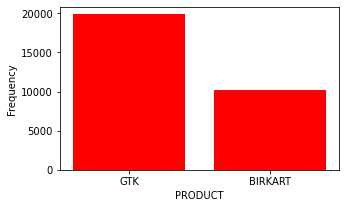

In [14]:
fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(5)
data = df['PRODUCT'].value_counts() 
points = data.index 
frequency = data.values 
ax.bar(points, frequency, color='red') 
ax.set_xlabel('PRODUCT') 
ax.set_ylabel('Frequency')

<b>Our target class has overwhelmingly more samples for class '0' than class '1' which can create problems in model performance. We will deal with it in the upcoming sections.</b>

Text(0, 0.5, 'Frequency')

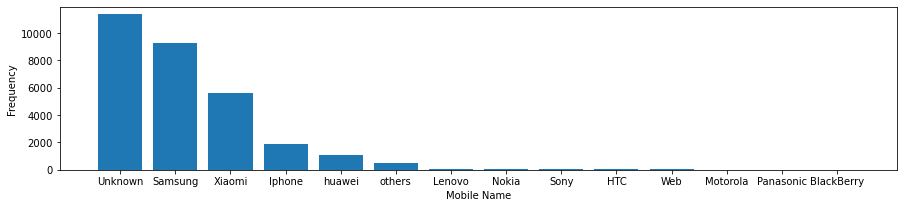

In [15]:
fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(15)
data = df['mobile_name'].value_counts() 
points = data.index 
frequency = data.values 
ax.bar(points, frequency) 
ax.set_xlabel('Mobile Name') 
ax.set_ylabel('Frequency')

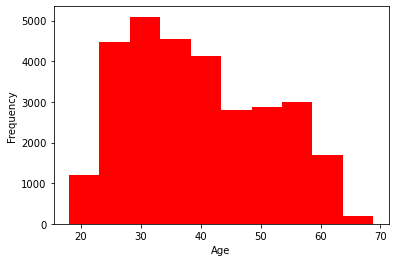

In [16]:
plt.hist(df['age'], color = 'red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 3 Outlier Treatment

### Z-score treatment

In [17]:
import warnings
warnings.filterwarnings('ignore')

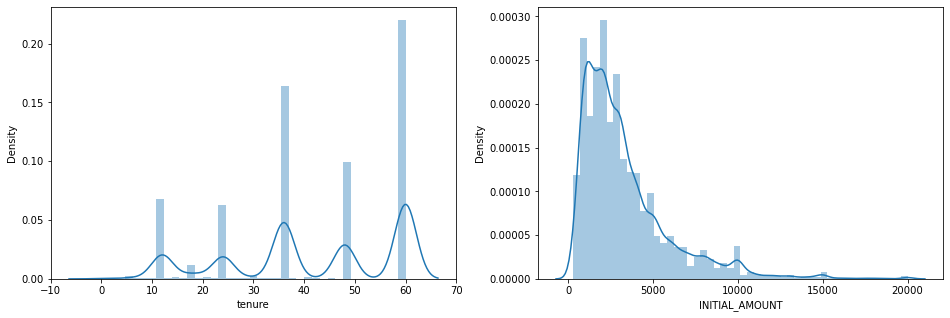

In [18]:
import seaborn as sns

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_le['tenure'])
plt.subplot(1,2,2)
sns.distplot(df_le['INITIAL_AMOUNT'])
plt.show()

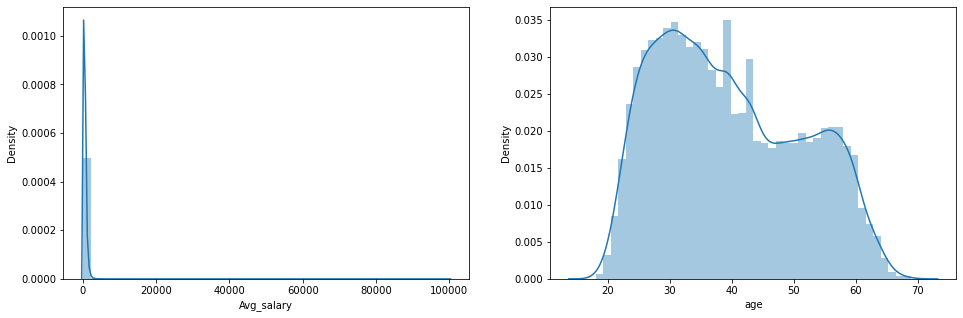

In [19]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_le['Avg_salary'])
plt.subplot(1,2,2)
sns.distplot(df_le['age'])
plt.show()

In [20]:
print("Maximum value of 'tenure': ", df_le['tenure'].max())
print("Minimum value of 'tenure': ", df_le['tenure'].min(), "\n")

print("Maximum value of 'INITIAL_AMOUNT': ", df_le['INITIAL_AMOUNT'].max())
print("Minimum value of 'INITIAL_AMOUNT': ", df_le['INITIAL_AMOUNT'].min(), "\n")

print("Maximum value of 'Avg_salary': ", df_le['Avg_salary'].max())
print("Minimum value of 'Avg_salary': ", df_le['Avg_salary'].min(), "\n")

print("Maximum value of 'age': ", df_le['age'].max())
print("Minimum value of 'age': ", df_le['age'].min(), "\n")

Maximum value of 'tenure':  60.0
Minimum value of 'tenure':  0.0 

Maximum value of 'INITIAL_AMOUNT':  20000.0
Minimum value of 'INITIAL_AMOUNT':  310.0 

Maximum value of 'Avg_salary':  100000.0
Minimum value of 'Avg_salary':  69.0 

Maximum value of 'age':  68.80360308562119
Minimum value of 'age':  18.02637973401233 



In [21]:
tenure_upper = df_le['tenure'].mean() + 3 * df_le['tenure'].std()
tenure_lower = df_le['tenure'].mean() - 3 * df_le['tenure'].std()
print("Highest allowed 'tenure': ", tenure_upper)
print("Lowest allowed 'tenure': ", tenure_lower, "\n")

INITIAL_AMOUNT_upper = df_le['INITIAL_AMOUNT'].mean() + 3 * df_le['INITIAL_AMOUNT'].std()
INITIAL_AMOUNT_lower = df_le['INITIAL_AMOUNT'].mean() - 3 * df_le['INITIAL_AMOUNT'].std()
print("Highest allowed 'INITIAL_AMOUNT': ", INITIAL_AMOUNT_upper)
print("Lowest allowed 'INITIAL_AMOUNT': ", INITIAL_AMOUNT_lower, "\n")

Avg_salary_upper = df_le['Avg_salary'].mean() + 3 * df_le['Avg_salary'].std()
Avg_salary_lower = df_le['Avg_salary'].mean() - 3 * df_le['Avg_salary'].std()
print("Highest allowed 'Avg_salary': ", Avg_salary_upper)
print("Lowest allowed 'Avg_salary': ", Avg_salary_lower, "\n")

age_upper = df_le['age'].mean() + 3 * df_le['age'].std()
age_lower = df_le['age'].mean() - 3 * df_le['age'].std()
print("Highest allowed 'age': ", age_upper)
print("Lowest allowed 'age': ", age_lower, "\n")

Highest allowed 'tenure':  91.6496840102879
Lowest allowed 'tenure':  -8.704679672037884 

Highest allowed 'INITIAL_AMOUNT':  11403.010755312507
Lowest allowed 'INITIAL_AMOUNT':  -4696.591333979171 

Highest allowed 'Avg_salary':  3650.287307515098
Lowest allowed 'Avg_salary':  -2512.1628021278725 

Highest allowed 'age':  74.0016619749305
Lowest allowed 'age':  5.153244793409925 



<b>According to graphs and upper & lower limits retrieved from Z-score treatment, columns "INITIAL_AMOUNT" and "Avg_salary" contains outliers.</b>

In [22]:
df_le[(df_le['INITIAL_AMOUNT'] > INITIAL_AMOUNT_upper) | (df_le['INITIAL_AMOUNT'] < INITIAL_AMOUNT_lower) |
      (df_le['Avg_salary'] > Avg_salary_upper) | (df_le['Avg_salary'] < Avg_salary_lower)]

,CONTRACT_NO,CUSTOMER_NO,START_DATE,DATE_OF_LOAN_MATURITY,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group,Bad Flag
116,98035,99034,2019-02-18,2023-02-18,1,48.0,12700.0,2,60,0,1,12,1018.00,22.798552,0,2,0
137,163005,89798,2019-07-09,2022-09-07,1,36.0,19000.0,7,58,1,6,2,1577.39,26.502940,9,1,0
164,207513,208512,2019-07-12,2023-12-07,1,48.0,13000.0,11,8,1,5,6,1410.00,40.931710,2,0,0
262,166341,50293,2019-07-09,2023-09-07,1,48.0,12600.0,9,49,0,4,11,910.00,59.478292,0,0,1
311,10144,11143,2019-01-25,2023-01-25,1,48.0,11550.0,9,72,1,0,6,796.49,52.803275,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29694,178743,111836,2019-03-28,2023-03-28,1,48.0,14200.0,7,22,1,4,11,1225.47,46.801782,4,4,0
29863,28230,29229,2019-03-28,2023-03-28,1,48.0,20000.0,9,8,1,10,6,1394.09,49.109838,2,2,0
29904,92085,93084,2019-04-09,2023-09-04,1,48.0,20000.0,12,8,1,10,7,1545.73,36.685216,2,2,0
29932,95428,96427,2019-05-17,2023-05-17,1,48.0,20000.0,2,63,0,2,0,1644.63,28.197704,2,1,0


<b>So, 562 rows out of 30,000 are outliers which need to be capped.</b>

In [23]:
df_le['INITIAL_AMOUNT'] = np.where(
    df_le['INITIAL_AMOUNT'] > INITIAL_AMOUNT_upper,
    INITIAL_AMOUNT_upper,
    np.where(
        df_le['INITIAL_AMOUNT'] < INITIAL_AMOUNT_lower,
        INITIAL_AMOUNT_lower,
        df_le['INITIAL_AMOUNT']
    )
)

df_le['Avg_salary'] = np.where(
    df_le['Avg_salary'] > Avg_salary_upper,
    Avg_salary_upper,
    np.where(
        df_le['Avg_salary'] < Avg_salary_lower,
        Avg_salary_lower,
        df_le['Avg_salary']
    )
)

<b>Here, we made values that are greater than upper limit equal to upper limit.<\b>

In [24]:
df_le['INITIAL_AMOUNT'].describe()

count    30000.000000
mean      3301.456559
std       2472.276459
min        310.000000
25%       1500.000000
50%       2600.000000
75%       4200.000000
max      11403.010755
Name: INITIAL_AMOUNT, dtype: float64

In [25]:
df_le['Avg_salary'].describe()

count    30000.000000
mean       553.059730
std        406.436888
min         69.000000
25%        278.750000
50%        444.905000
75%        671.500000
max       3650.287308
Name: Avg_salary, dtype: float64

# 4 Feature Transformation and Scaling

### Standard Scaler

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = df_le.copy()
col_names = ['Income', 'Age']

col_names = ['tenure', 'INITIAL_AMOUNT', 'Avg_salary', 'age']
df_scaled[col_names] = scaler.fit_transform(df_scaled[col_names].values)
df_scaled

,CONTRACT_NO,CUSTOMER_NO,START_DATE,DATE_OF_LOAN_MATURITY,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group,Bad Flag
0,25103,26102,2019-02-18,2024-10-01,0,1.107743,1.253337,2,11,1,7,9,1.280614,1.517691e+00,1,1,0
1,178508,179507,2019-08-09,2022-09-08,1,-0.327196,-0.344408,9,30,1,4,11,-0.376989,-4.042881e-01,5,5,0
2,44173,45172,2019-08-14,2024-10-07,0,1.107743,-0.445531,11,8,1,5,9,1.259455,-3.148105e-01,2,2,0
3,110572,111571,2019-06-25,2022-06-25,1,-0.327196,1.900524,2,8,0,2,9,1.695101,-1.361579e+00,2,2,0
4,44085,45084,2019-06-13,2023-06-13,1,0.390273,1.496032,11,46,1,0,0,-0.461653,-8.347352e-01,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,33007,12564,2019-12-18,2022-12-18,1,-0.327196,-0.477890,11,1,0,0,12,-0.851462,-1.675899e-01,5,5,0
29996,173631,174630,2019-09-16,2023-09-16,1,0.390273,0.019635,11,52,0,10,12,-0.713062,3.529633e-14,9,2,0
29997,61236,62235,2019-07-17,2022-07-17,1,-0.327196,-0.388902,9,66,1,9,12,-0.730900,-4.343526e-01,1,1,0
29998,209538,210537,2019-01-23,2020-01-23,1,-1.762135,-0.223060,11,75,1,6,2,0.313634,-7.599394e-01,4,4,0


In [27]:
df_scaled.describe()[col_names]

,tenure,INITIAL_AMOUNT,Avg_salary,age
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,2.677636e-16,-6.284973e-17,1.764588e-16,-2.530864e-16
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-2.479605e+00,-1.210021e+00,-1.191004e+00,-1.878164e+00
25%,-3.271961e-01,-7.286752e-01,-6.749247e-01,-8.347352e-01
50%,-3.271961e-01,-2.837337e-01,-2.661090e-01,-1.438485e-01
75%,1.107743e+00,3.634539e-01,2.914161e-01,8.178571e-01
max,1.107743e+00,3.277016e+00,7.620566e+00,2.547042e+00


<b>Standard Scaler makes values mean 0 and standard deviation 1. If we check our 4 features which are scaled, it is seen that although mean and standard deviation is not exactly equal to 0 an 1, but there are very close.</b>

# 5 Feature Extraction

<b>First of all, we don't need columns "CONTRACT_NO" and "CUSTOMER_NO" as they have no contribution to generalization. We will drop those 2 columns. Secondly, rather than having loan start and end they, it is better to use 1 feature representing duration of loan in format of days.</b>

In [28]:
loan_duration = pd.to_timedelta(df_scaled['DATE_OF_LOAN_MATURITY'] - df_scaled['START_DATE']).astype('timedelta64[D]')
df_ext = df_scaled[df.columns[4:]]
df_ext.insert(loc = 0, column = 'LOAN_DURATION_DAYS', value = loan_duration)
df_ext

,LOAN_DURATION_DAYS,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group,Bad Flag
0,2052.0,0,1.107743,1.253337,2,11,1,7,9,1.280614,1.517691e+00,1,1,0
1,1126.0,1,-0.327196,-0.344408,9,30,1,4,11,-0.376989,-4.042881e-01,5,5,0
2,1881.0,0,1.107743,-0.445531,11,8,1,5,9,1.259455,-3.148105e-01,2,2,0
3,1096.0,1,-0.327196,1.900524,2,8,0,2,9,1.695101,-1.361579e+00,2,2,0
4,1461.0,1,0.390273,1.496032,11,46,1,0,0,-0.461653,-8.347352e-01,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1096.0,1,-0.327196,-0.477890,11,1,0,0,12,-0.851462,-1.675899e-01,5,5,0
29996,1461.0,1,0.390273,0.019635,11,52,0,10,12,-0.713062,3.529633e-14,9,2,0
29997,1096.0,1,-0.327196,-0.388902,9,66,1,9,12,-0.730900,-4.343526e-01,1,1,0
29998,365.0,1,-1.762135,-0.223060,11,75,1,6,2,0.313634,-7.599394e-01,4,4,0


<b>We also need to scale that new column.</b>

In [29]:
df_ext[['LOAN_DURATION_DAYS']] = scaler.fit_transform(df_ext[['LOAN_DURATION_DAYS']].values)
df_ext

,LOAN_DURATION_DAYS,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group,Bad Flag
0,1.476703,0,1.107743,1.253337,2,11,1,7,9,1.280614,1.517691e+00,1,1,0
1,-0.270960,1,-0.327196,-0.344408,9,30,1,4,11,-0.376989,-4.042881e-01,5,5,0
2,1.153970,0,1.107743,-0.445531,11,8,1,5,9,1.259455,-3.148105e-01,2,2,0
3,-0.327579,1,-0.327196,1.900524,2,8,0,2,9,1.695101,-1.361579e+00,2,2,0
4,0.361294,1,0.390273,1.496032,11,46,1,0,0,-0.461653,-8.347352e-01,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.327579,1,-0.327196,-0.477890,11,1,0,0,12,-0.851462,-1.675899e-01,5,5,0
29996,0.361294,1,0.390273,0.019635,11,52,0,10,12,-0.713062,3.529633e-14,9,2,0
29997,-0.327579,1,-0.327196,-0.388902,9,66,1,9,12,-0.730900,-4.343526e-01,1,1,0
29998,-1.707214,1,-1.762135,-0.223060,11,75,1,6,2,0.313634,-7.599394e-01,4,4,0


# 6 Model Development

<b> We have 4 models including Logistic Regression, Ridge Classifier, Random Forest Classifier, and Gradient Boosting Classifier. <b>

In [30]:
from sklearn.model_selection import train_test_split

X = df_ext.drop('Bad Flag', axis=1)
y = df_ext['Bad Flag']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

pipelines = {
    'lr':make_pipeline(LogisticRegression()),
    'rc':make_pipeline(RidgeClassifier()),
    'rf':make_pipeline(RandomForestClassifier()),
    'gb':make_pipeline(GradientBoostingClassifier()),
}

In [33]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

# 7 Model Performance

In [34]:
from sklearn.metrics import accuracy_score

for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 0.9286666666666666
rc 0.9286666666666666
rf 0.9293333333333333
gb 0.931


In [35]:
import random

random_sample = random.randint(0, len(X_test) - 1)
lr = list(fit_models.items())[0][1]
print("Probability of a random borrower defaults on loan: ", round(lr.predict_proba(X_test.iloc[[random_sample]])[0][1] * 100, 2), "%")

Probability of a random borrower defaults on loan:  3.94 %


In [36]:
from sklearn.metrics import precision_recall_fscore_support

y_pred = lr.predict(X_test)

precision = precision_recall_fscore_support(y_test, y_pred, average='weighted')[0]
recall = precision_recall_fscore_support(y_test, y_pred, average='weighted')[1]
f1_score = precision_recall_fscore_support(y_test, y_pred, average='weighted')[2]
print("Precision: ", round(precision * 100, 2), "%")
print("Recall: ", round(recall * 100, 2), "%")
print("F1-Score: ", round(f1_score * 100, 2), "%")

Precision:  86.24 %
Recall:  92.87 %
F1-Score:  89.43 %


In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
auc_score = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
print("AUC (Area Under Curve) Score: ", auc_score)

AUC (Area Under Curve) Score:  0.7078101622934432


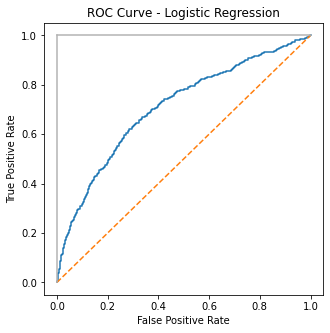

In [38]:
plt.subplots(1, figsize=(5, 5))
plt.title('ROC Curve - Logistic Regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
gini_score = 2 * auc_score - 1
print("Gini Coefficient Score: ", gini_score)

Gini Coefficient Score:  0.41562032458688636


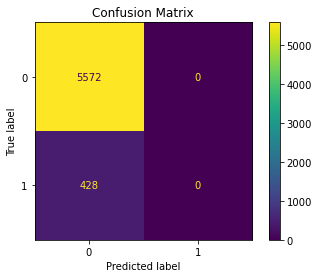

In [40]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test) 
plt.title('Confusion Matrix')
plt.show()

<b>Confusion matrix states that all predictions are '0'. If we look at number of unique values in our target class "Bad Flag", we will see that our data is imbalanced. We have 27766 value of '0' and only 2234 value of '1'. Model becomes biased when it constantly predicts only 1 target. It results in good accuracy, precision, recall, and F1-score. On the other hand, if we look at gini coefficient score, we will see that our model is biased. Now, I'll perform 1 oversampling and 1 undersampling techniques in order to overcome imbalanced data problem and increase model performance.</b>

### Near Miss Undersampling

In [41]:
from collections import Counter
from imblearn.under_sampling import NearMiss

undersampling = NearMiss(version = 1, n_neighbors = 3)
X1, y1 = undersampling.fit_resample(X, y)
counter = Counter(y1)
print(counter)

Counter({0: 2234, 1: 2234})


In [42]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)

pipelines1 = {
    'lr (undersampling)':make_pipeline(LogisticRegression()),
    'rc (undersampling)':make_pipeline(RidgeClassifier()),
    'rf (undersampling)':make_pipeline(RandomForestClassifier()),
    'gb (undersampling)':make_pipeline(GradientBoostingClassifier()),
}

fit_models1 = {}
for algo, pipeline in pipelines1.items():
    model = pipeline.fit(X1_train, y1_train)
    fit_models1[algo] = model

for algo, model in fit_models1.items():
    yhat1 = model.predict(X1_test)
    print(algo, accuracy_score(y1_test, yhat1))

lr (undersampling) 0.7080536912751678
rc (undersampling) 0.7102908277404921
rf (undersampling) 0.7796420581655481
gb (undersampling) 0.7941834451901566


In [43]:
random_sample = random.randint(0, len(X1_test) - 1)
lr1 = list(fit_models1.items())[0][1]
print("Probability of a random borrower defaults on loan (undersampling): ", round(lr1.predict_proba(X1_test.iloc[[random_sample]])[0][1] * 100, 2), "%")

Probability of a random borrower defaults on loan (undersampling):  48.53 %


In [44]:
y1_pred = lr1.predict(X1_test)

precision1 = precision_recall_fscore_support(y1_test, y1_pred, average='weighted')[0]
recall1 = precision_recall_fscore_support(y1_test, y1_pred, average='weighted')[1]
f1_score1 = precision_recall_fscore_support(y1_test, y1_pred, average='weighted')[2]
print("Precision (undersampling): ", round(precision1 * 100, 2), "%")
print("Recall (undersampling): ", round(recall1 * 100, 2), "%")
print("F1-Score (undersampling): ", round(f1_score1 * 100, 2), "%")

Precision (undersampling):  70.86 %
Recall (undersampling):  70.81 %
F1-Score (undersampling):  70.79 %


In [45]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y1_test, lr1.predict_proba(X1_test)[:, 1])
auc_score1 = roc_auc_score(y1_test, lr1.predict_proba(X1_test)[:, 1])
print("AUC (Area Under Curve) Score (undersampling): ", auc_score1)

AUC (Area Under Curve) Score (undersampling):  0.7753009183954356


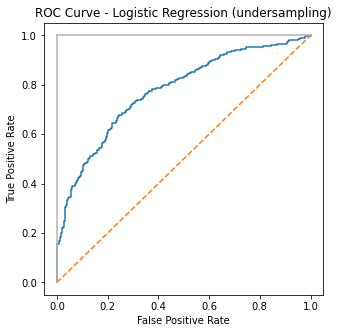

In [46]:
plt.subplots(1, figsize=(5, 5))
plt.title('ROC Curve - Logistic Regression (undersampling)')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
gini_score1 = 2 * auc_score1 - 1
print("Gini Coefficient Score (undersampling): ", gini_score1)

Gini Coefficient Score (undersampling):  0.5506018367908712


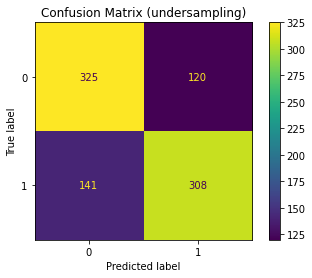

In [48]:
plot_confusion_matrix(lr1, X1_test, y1_test)  
plt.title('Confusion Matrix (undersampling)')
plt.show()

### Borderline-SMOTE Oversampling

In [49]:
from imblearn.over_sampling import BorderlineSMOTE

oversampling = BorderlineSMOTE()
X2, y2 = oversampling.fit_resample(X, y)
counter = Counter(y2)
print(counter)

Counter({0: 27766, 1: 27766})


In [50]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2)

pipelines2 = {
    'lr (oversampling)':make_pipeline(LogisticRegression()),
    'rc (oversampling)':make_pipeline(RidgeClassifier()),
    'rf (oversampling)':make_pipeline(RandomForestClassifier()),
    'gb (oversampling)':make_pipeline(GradientBoostingClassifier()),
}

fit_models2 = {}
for algo, pipeline in pipelines2.items():
    model = pipeline.fit(X2_train, y2_train)
    fit_models2[algo] = model

for algo, model in fit_models2.items():
    yhat2 = model.predict(X2_test)
    print(algo, accuracy_score(y2_test, yhat2))

lr (oversampling) 0.6684973440172864
rc (oversampling) 0.6677770775186819
rf (oversampling) 0.9496713784100117
gb (oversampling) 0.8431619699288737


In [51]:
random_sample = random.randint(0, len(X2_test) - 1)
lr2 = list(fit_models2.items())[0][1]
print("Probability of a random borrower defaults on loan (oversampling): ", round(lr2.predict_proba(X2_test.iloc[[random_sample]])[0][1] * 100, 2), "%")

Probability of a random borrower defaults on loan (oversampling):  73.16 %


In [52]:
y2_pred = lr2.predict(X2_test)

precision2 = precision_recall_fscore_support(y2_test, y2_pred, average='weighted')[0]
recall2 = precision_recall_fscore_support(y2_test, y2_pred, average='weighted')[1]
f1_score2 = precision_recall_fscore_support(y2_test, y2_pred, average='weighted')[2]
print("Precision (oversampling): ", round(precision2 * 100, 2), "%")
print("Recall (oversampling): ", round(recall2 * 100, 2), "%")
print("F1-Score (oversampling): ", round(f1_score2 * 100, 2), "%")

Precision (oversampling):  66.88 %
Recall (oversampling):  66.85 %
F1-Score (oversampling):  66.85 %


In [53]:
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y2_test, lr2.predict_proba(X2_test)[:, 1])
auc_score2 = roc_auc_score(y2_test, lr2.predict_proba(X2_test)[:, 1])
print("AUC (Area Under Curve) Score (oversampling): ", auc_score2)

AUC (Area Under Curve) Score (oversampling):  0.7301955415088421


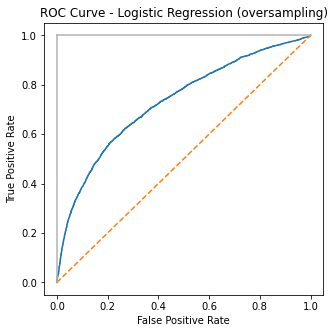

In [54]:
plt.subplots(1, figsize=(5, 5))
plt.title('ROC Curve - Logistic Regression (oversampling)')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [55]:
gini_score2 = 2 * auc_score2 - 1
print("Gini Coefficient Score (oversampling): ", gini_score2)

Gini Coefficient Score (oversampling):  0.4603910830176843


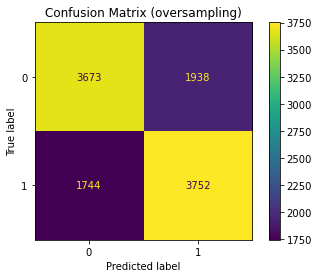

In [56]:
plot_confusion_matrix(lr2, X2_test, y2_test)  
plt.title('Confusion Matrix (oversampling)')
plt.show()

<b>After applying undersampling & oversampling, our accuracy score decreased. However, as I mentioned earlier accuracy score is not appropriate metric for this task. What we need to look at is Gini Coefficient score and AUC score. After applying undersampling & oversampling, those metrics scores have been significantly increased. To go beyond this performance, we may need more qualitative data for target class "1".</b>